In [35]:
# https://stackoverflow.com/questions/61753567/convert-cumsum-output-to-binary-array-in-xarray

In [9]:
import numpy as np
import xarray as xr
import pandas as pd

In [18]:
# # Create demo x-array
# data = np.random.rand(20, 5, 5)
data = (np.random.rand(20, 5, 5) > 0.5).astype(int)

times = pd.date_range('2000-01-01', periods=20)
lats = np.arange(10, 0, -2)
lons = np.arange(0, 10, 2)
data = xr.DataArray(data, coords=[times, lats, lons], dims=['time', 'lat', 'lon'])
# data.values[6:12] = 0 # Ensure some values are set to zero so that the cumsum can reset between valid time steps
# data.values[18:] = 0


data

<xarray.DataArray (time: 20, lat: 5, lon: 5)> Size: 4kB
array([[[1, 1, 0, 1, 1],
        [0, 1, 0, 1, 1],
        [0, 1, 0, 1, 0],
        [0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0]],

       [[1, 0, 0, 1, 1],
        [1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1],
        [1, 1, 0, 0, 1]],

       [[1, 0, 0, 1, 0],
        [1, 1, 1, 0, 1],
        [1, 0, 1, 1, 0],
        [1, 0, 0, 1, 0],
        [1, 1, 0, 0, 1]],

       [[1, 1, 1, 1, 0],
        [1, 0, 1, 1, 0],
...
        [0, 1, 0, 1, 0],
        [0, 0, 1, 1, 1]],

       [[0, 0, 1, 1, 0],
        [0, 0, 0, 1, 0],
        [1, 1, 0, 1, 1],
        [1, 1, 1, 0, 1],
        [1, 1, 0, 1, 0]],

       [[1, 1, 1, 0, 0],
        [0, 1, 0, 0, 1],
        [1, 1, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [1, 1, 0, 0, 0]],

       [[1, 0, 1, 0, 0],
        [0, 0, 1, 1, 1],
        [0, 0, 1, 0, 1],
        [1, 0, 1, 1, 0],
        [1, 1, 0, 0, 0]]])
Coordinates:
  * time     (time) datetime64[ns] 160B 2000-01-01 2000-01-02 ... 2000-01-20
  * lat      (lat) int64 40B 10 8 6 4 2
  * lon      (lon) int64 40B 0 2 4 6 8

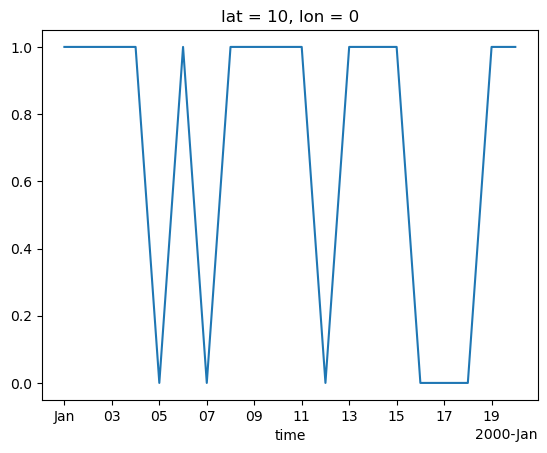

In [19]:
data[:, 0, 0].plot()

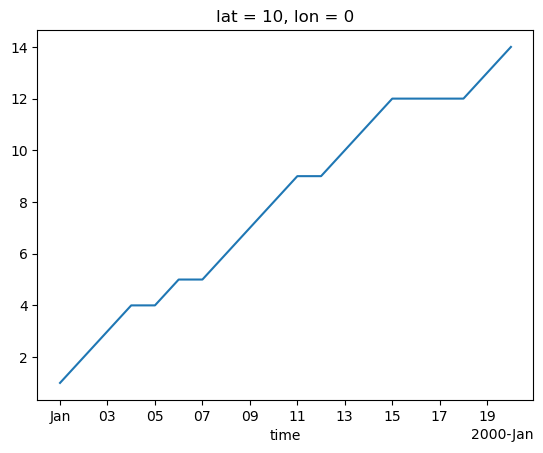

In [27]:
data.cumsum(dim='time')[:, 0, 0].plot()

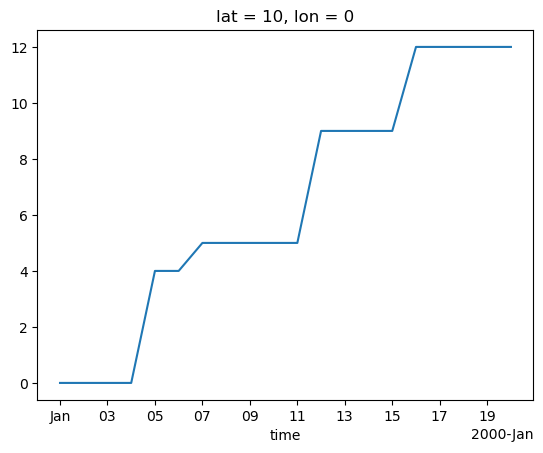

In [30]:
data.cumsum(dim='time').where(data.values == 0).ffill(dim='time').fillna(0)[:, 0, 0].plot()

In [20]:
# This creates an xarray whereby the cumsum is calculated but resets each time a zero value is found
cumulative = data.cumsum(dim='time')-data.cumsum(dim='time').where(data.values == 0).ffill(dim='time').fillna(0)
cumulative

<xarray.DataArray (time: 20, lat: 5, lon: 5)> Size: 4kB
array([[[1., 1., 0., 1., 1.],
        [0., 1., 0., 1., 1.],
        [0., 1., 0., 1., 0.],
        [0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0.]],

       [[2., 0., 0., 2., 2.],
        [1., 2., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 2.],
        [1., 1., 0., 0., 1.]],

       [[3., 0., 0., 3., 0.],
        [2., 3., 1., 0., 1.],
        [1., 0., 1., 1., 0.],
        [2., 0., 0., 1., 0.],
        [2., 2., 0., 0., 2.]],

       [[4., 1., 1., 4., 0.],
        [3., 0., 2., 1., 0.],
...
        [0., 2., 0., 3., 0.],
        [0., 0., 1., 1., 1.]],

       [[0., 0., 1., 2., 0.],
        [0., 0., 0., 1., 0.],
        [4., 1., 0., 1., 1.],
        [1., 3., 1., 0., 1.],
        [1., 1., 0., 2., 0.]],

       [[1., 1., 2., 0., 0.],
        [0., 1., 0., 0., 1.],
        [5., 2., 0., 0., 2.],
        [0., 0., 0., 1., 0.],
        [2., 2., 0., 0., 0.]],

       [[2., 0., 3., 0., 0.],
        [0., 0., 1., 1., 2.],
        [0., 0., 1., 0., 3.],
        [1., 0., 1., 2., 0.],
        [3., 3., 0., 0., 0.]]])
Coordinates:
  * time     (time) datetime64[ns] 160B 2000-01-01 2000-01-02 ... 2000-01-20
  * lat      (lat) int64 40B 10 8 6 4 2
  * lon      (lon) int64 40B 0 2 4 6 8

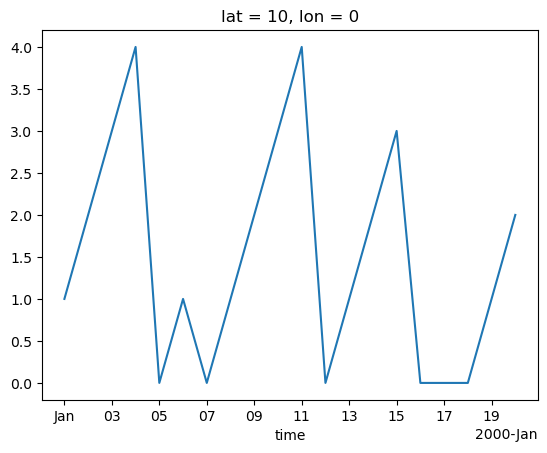

In [21]:
cumulative[:, 0, 0].plot()

In [22]:
# make something to put results in
out = xr.full_like(cumulative, fill_value=0.0)
out

<xarray.DataArray (time: 20, lat: 5, lon: 5)> Size: 4kB
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
...
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]])
Coordinates:
  * time     (time) datetime64[ns] 160B 2000-01-01 2000-01-02 ... 2000-01-20
  * lat      (lat) int64 40B 10 8 6 4 2
  * lon      (lon) int64 40B 0 2 4 6 8

In [23]:
# find the points which have met the criteria
out.values[cumulative.values > 3] = 1
out

<xarray.DataArray (time: 20, lat: 5, lon: 5)> Size: 4kB
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[1., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0.],
...
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]])
Coordinates:
  * time     (time) datetime64[ns] 160B 2000-01-01 2000-01-02 ... 2000-01-20
  * lat      (lat) int64 40B 10 8 6 4 2
  * lon      (lon) int64 40B 0 2 4 6 8

In [24]:
# fill the other valid sections over 0, with nans so we can fill them
out.values[(cumulative.values>0) & (cumulative.values<3)] = np.nan
out

<xarray.DataArray (time: 20, lat: 5, lon: 5)> Size: 4kB
array([[[nan, nan,  0., nan, nan],
        [ 0., nan,  0., nan, nan],
        [ 0., nan,  0., nan,  0.],
        [ 0.,  0.,  0., nan, nan],
        [ 0.,  0.,  0.,  0.,  0.]],

       [[nan,  0.,  0., nan, nan],
        [nan, nan,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [nan,  0., nan,  0., nan],
        [nan, nan,  0.,  0., nan]],

       [[ 0.,  0.,  0.,  0.,  0.],
        [nan,  0., nan,  0., nan],
        [nan,  0., nan, nan,  0.],
        [nan,  0.,  0., nan,  0.],
        [nan, nan,  0.,  0., nan]],

       [[ 1., nan, nan,  1.,  0.],
        [ 0.,  0., nan, nan,  0.],
...
        [ 0., nan,  0.,  0.,  0.],
        [ 0.,  0., nan, nan, nan]],

       [[ 0.,  0., nan, nan,  0.],
        [ 0.,  0.,  0., nan,  0.],
        [ 1., nan,  0., nan, nan],
        [nan,  0., nan,  0., nan],
        [nan, nan,  0., nan,  0.]],

       [[nan, nan, nan,  0.,  0.],
        [ 0., nan,  0.,  0., nan],
        [ 1., nan,  0.,  0., nan],
        [ 0.,  0.,  0., nan,  0.],
        [nan, nan,  0.,  0.,  0.]],

       [[nan,  0.,  0.,  0.,  0.],
        [ 0.,  0., nan, nan, nan],
        [ 0.,  0., nan,  0.,  0.],
        [nan,  0., nan, nan,  0.],
        [ 0.,  0.,  0.,  0.,  0.]]])
Coordinates:
  * time     (time) datetime64[ns] 160B 2000-01-01 2000-01-02 ... 2000-01-20
  * lat      (lat) int64 40B 10 8 6 4 2
  * lon      (lon) int64 40B 0 2 4 6 8

In [25]:
# backfill it, so the ones that have not reached 2 are filled with 0
# and the ones that have are filled with 1
out_ds = out.bfill(dim='time').fillna(1)
out_ds

<xarray.DataArray (time: 20, lat: 5, lon: 5)> Size: 4kB
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[1., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0.],
...
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 0.],
        [0., 0., 1., 1., 1.],
        [0., 0., 1., 0., 0.],
        [1., 0., 1., 1., 0.],
        [0., 0., 0., 0., 0.]]])
Coordinates:
  * time     (time) datetime64[ns] 160B 2000-01-01 2000-01-02 ... 2000-01-20
  * lat      (lat) int64 40B 10 8 6 4 2
  * lon      (lon) int64 40B 0 2 4 6 8

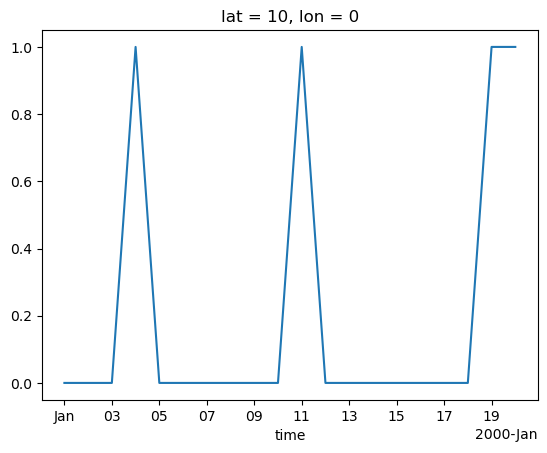

In [26]:
out_ds[:, 0, 0].plot()